In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
cd F:\Vaibhavi\Data science\Python\Machine Learing

F:\Vaibhavi\Data science\Python\Machine Learing


In [3]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [14]:
df['region'].unique()

array([3, 2, 1, 0])

In [15]:
df['smoker'].unique()

array([1, 0])

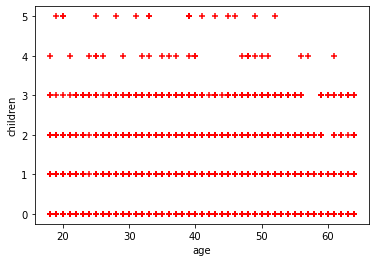

In [6]:
plt.xlabel('age')
plt.ylabel('children')
plt.scatter(df.age,df.children,color='red',marker='+')
plt.show()

<BarContainer object of 1338 artists>

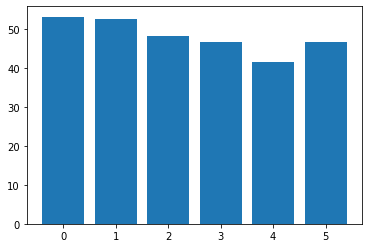

In [7]:
plt.bar(df['children'],df['bmi'])

In [8]:
labelencoder=LabelEncoder()

In [9]:
df[['sex','smoker','region',]]=df[['sex','smoker','region']].apply(labelencoder.fit_transform)

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [16]:
from sklearn.preprocessing import StandardScaler
scl=StandardScaler()


In [22]:
df1=pd.DataFrame(scl.fit_transform(df),columns=df.columns)

In [23]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,-1.010519,-0.453320,-0.908614,1.970587,1.343905,0.298584
1,-1.509965,0.989591,0.509621,-0.078767,-0.507463,0.438495,-0.953689
2,-0.797954,0.989591,0.383307,1.580926,-0.507463,0.438495,-0.728675
3,-0.441948,0.989591,-1.305531,-0.908614,-0.507463,-0.466915,0.719843
4,-0.513149,0.989591,-0.292556,-0.908614,-0.507463,-0.466915,-0.776802


In [26]:
x=df1.drop('charges',axis=1)
y=df['charges']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [32]:
x_train.shape,x_test.shape

((936, 6), (402, 6))

In [34]:
y_train.shape,y_test.shape

((936,), (402,))

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [36]:
lr.score(x_train,y_train)

0.7614284451982047

In [38]:
lr.score(x_test,y_test)

0.7183245518407817

In [40]:
y_pred=lr.predict(x_test)
y_pred

array([ 8300.25331111,  5898.37327561, 15202.36890326, 11687.23188017,
        3744.64036534,  9717.48857035,  9965.91189885, 26201.36280933,
        8015.08128162, 31276.66456561,  1807.24286867,  4147.07380188,
        7494.67368466, 11456.56430654, 13008.33765694, 11360.33257462,
        5652.22997614, 18402.0423214 , 10769.16902585, 31167.14428256,
       34409.19260264,  4106.30178863,  1189.30452588,  7463.3122754 ,
        4583.2438516 , 13525.43289152, 11813.24171734, 10755.64256762,
        6318.34542428, 31196.9204845 , -1849.14890589, 34141.19663923,
        9645.20311011,  7700.38031302,  8089.82326242, 12048.50626972,
       13607.92344874, 12583.0736086 , 10082.8315077 ,  8588.08764997,
       16134.77015137, 10089.09469913,  5550.92111062, 11512.75228309,
        5266.74290175,  7595.58446318,  6905.54606857, 34652.16949477,
       11325.49924672, 10829.04475023, 32867.71036904,  5543.98780892,
       10332.99479677, 14937.60932216, 11358.93405539, 13568.6005838 ,
      

In [41]:
from sklearn.metrics import r2_score

In [45]:
score=r2_score

In [48]:
score(y_test,y_pred)

0.7183245518407817